# Variables

In [1]:
ga_input = '/grid/home/nbourgeois/data/test_proteins/pah/pah.pep.fas' #sequence pep.fas Input
tissue = 'Liver' # Tissue type for CoCoPuts
filename = 'bai_1'

# Imports


In [2]:
import os
cwd = os.getcwd()

## Import the code for codon opt
import sys
sys.path.insert(1, '/grid/home/nbourgeois/codonOpt')
# from run_pygad import *
from general_functions import *
from dyn_prog import *
from run_pygad import *


In [3]:
(keys, seqs) = readFasta(ga_input)
if len(seqs) == 1:
    aa_seq=str(seqs[0])

In [4]:
wt_loc = '/grid/home/nbourgeois/data/codon_jason/wt_pah.fa'
a,seq = readFasta(wt_loc)
wt_seq = str(seq[0])

## Test Max

In [5]:
optimizer = Optimizer(aa_seq, tissues='Liver')
optimized_seq = optimizer.optimize()

## Test Ramp

In [6]:
optimizer = Optimizer(aa_seq, tissues='Liver', ramp=True)
optimized_seq = optimizer.optimize()

## Test OG Ramp

In [7]:
optimizer = Optimizer(aa_seq, tissues='Liver', og_ramp=True, og_seq=wt_seq)
optimized_seq = optimizer.optimize()

## Test Multi Weight

In [8]:
weights = pd.read_csv('test_data/weights.txt',sep='\t')
tissue_list = weights['Tissue'].values.tolist()
prefix_codon = 'AAG'

In [9]:
tissue_list = tissue_list[1:4]

In [10]:
optimizer = Optimizer(aa_seq, tissues=tissue_list, prefix_codon=prefix_codon)
optimized_seq = optimizer.optimize()
optimizer = Optimizer(aa_seq, tissues=tissue_list, ntissues='Liver', prefix_codon=prefix_codon)
optimized_seq = optimizer.optimize()


# Test CAI

In [11]:
cns_aa_seq = 'KLLLVPRELSGSSPVLEETHPAHQQGASRPGPRDAQAHPGRPRAVPTQCDVPPNSRFDCAPDKAITQEQCEARGCCYIPAKQGLQGAQMGQPWCFFPPSYPSYKLENLSSSEMGYTATLTRTTPTFFPKDILTLRLDVMMETENRLHFTIKDPANRRYEVPLETPHVHSRAPSPLYSVEFSEEPFGVIVRRQLDGRVLLNTTVAPLFFADQFLQLSTSLPSQYITGLAEHLSPLMLSTSWTRITLWNRDLAPTPGANLYGSHPFYLALEDGGSAHGVFLLNSNAMDVVLQPSPALSWRSTGGILDVYIFLGPEPKSVVQQYLDVVGYPFMPPYWGLGFHLCRWGYSSTAITRQVVENMTRAHFPLDVQWNDLDYMDSRRDFTFNKDGFRDFPAMVQELHQGGRRYMMIVDPAISSSGPAGSYRPYDEGLRRGVFITNETGQPLIGKVWPGSTAFPDFTNPTALAWWEDMVAEFHDQVPFDGMWIDMNEPSNFIRGSEDGCPNNELENPPYVPGVVGGTLQAATICASSHQFLSTHYNLHNLYGLTEAIASHRALVKARGTRPFVISRSTFAGHGRYAGHWTGDVWSSWEQLASSVPEILQFNLLGVPLVGADVCGFLGNTSEELCVRWTQLGAFYPFMRNHNSLLSLPQEPYSFSEPAQQAMRKALTLRYALLPHLYTLFHQAHVAGETVARPLFLEFPKDSSTWTVDHQLLWGEALLITPVLQAGKAEVTGYFPLGTWYDLQTVPVEALGSLPPPPAAPREPAIHSEGQWVTLPAPLDTINVHLRAGYIIPLQGPGLTTTESRQQPMALAVALTKGGEARGELFWDDGESLEVLERGAYTQVIFLARNNTIVNELVRVTSEGAGLQLQKVTVLGVATAPQQVLSNGVPVSNFTYSPDTKVLDICVSLLMGEQFLVSWC'

In [25]:
optimizer = Optimizer(cns_aa_seq, tissues='Artery_Aorta', ntissues='Liver', prefix_codon=prefix_codon)
optimizer.method='CAI'
optimized_seq = optimizer.optimize()
cai_mets =  get_cai(optimized_seq,optimizer.cai_weight_dict['Liver']),get_cai(optimized_seq,optimizer.cai_weight_dict['Artery_Aorta'])
cai_diff = - get_cai(optimized_seq,optimizer.cai_weight_dict['Liver']) + get_cai(optimized_seq,optimizer.cai_weight_dict['Artery_Aorta'])

In [44]:
cai_diff

0.016574145796511397

In [39]:
optimizer = Optimizer(cns_aa_seq, tissues='Artery_Aorta', ntissues='Liver', prefix_codon=prefix_codon)
optimized_seq = optimizer.optimize()
bai_mets =  (get_bai(optimized_seq,optimizer.bai_weight_dict['Liver']),get_bai(optimized_seq,optimizer.bai_weight_dict['Artery_Aorta']))
bai_diff =  + get_bai(optimized_seq,optimizer.bai_weight_dict['Artery_Aorta'])- get_bai(optimized_seq,optimizer.bai_weight_dict['Liver'])

In [ ]:
bai_diff, bai_mets

(0.13679174403388472, (0.5276503414150454, 0.6644420854489301))

In [27]:
optimizer = Optimizer(cns_aa_seq, tissues='Liver', ntissues='Artery_Aorta', prefix_codon=prefix_codon)
optimized_seq = optimizer.optimize()
get_bai(optimized_seq,optimizer.bai_weight_dict['Liver']),get_bai(optimized_seq,optimizer.bai_weight_dict['Artery_Aorta'])

(0.6523378316590281, 0.44787291187775413)

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects  as go
import plotly
colors=['rgb(0,50,90)',
        'rgb(246,126,94)',
        'rgb(106,118,132)',
        'rgb(116,81,173)',
        'rgb(20,103,172)',
        'rgb(41,171,226)',
        'rgb(51,51,51)',
       'rgb(0,50,90)']

In [114]:
df = pd.DataFrame()
df['variable'] = ['CAI','CAI','BAI','BAI']
df['value'] = cai_mets + bai_mets
df['Tissue'] = ['Liver','Heart']*2

In [115]:
color_discrete_map

{'Liver': 'rgb(0/255,50/255,90/255,1)',
 'Heart': 'rgb(246/255,126/255,94/255,1)'}

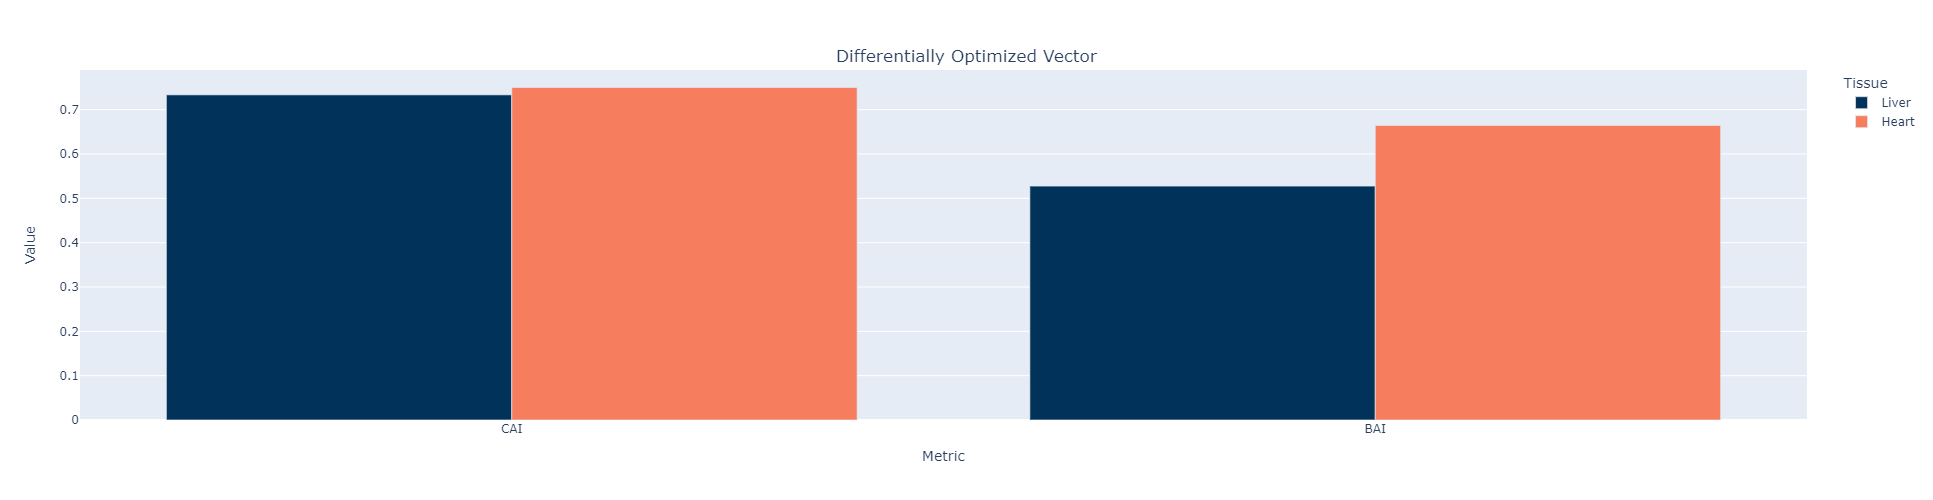

In [118]:
color_discrete_map={}
i = 0
for x in df['Tissue'].unique(): 
    color_discrete_map[x] = colors[i]
    i +=1



fig = px.bar(df, x='variable', y='value', color='Tissue',barmode="group",
    color_discrete_map=color_discrete_map, 
    labels={
                 "diff": "Heart and Liver Difference",
                 "value": "Value",
                 "variable" : 'Metric'
             },
    title='Differentially Optimized Vector',
                 width=550, height=500
    )
layout = go.Layout(
  margin=go.layout.Margin(
        t=70, #top margin
    )
)
# fig.update_traces(marker_size=7)
fig.update_layout(layout)
fig.update_layout(title_y=.9, title_x=.5)
fig.show()

In [90]:

# plt.rcParams['figure.figsize'] = [5, 4]
# ax = sns.barplot(data=df,x='variable',y='metric',hue='Tissue',dodge=True)
# plt.title('Differentially Optimized Vector', size = 16)
# plt.ylabel('Metric Score', size = 13)
# plt.xlabel('Metric', size = 13)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
